In [1]:
from matplotlib import colormaps as cm
import matplotlib.pyplot as plt
import pandas as pd


def get_color(p):
    return cm["viridis"](p / 8)

In [2]:
ndims = 3
df = pd.read_csv(f"/home/jp7427/Desktop/FVHOE/out/square_timing_{ndims}D.csv")
df["updates_per_s"] = df.n_steps * df.n_substeps * df.DOFs / df.total_time
df["s_per_1000000_updates"] = df.total_time / (
    (df.n_steps * df.n_substeps * df.DOFs) / 1000000
)
df["s_per_1000000_riemanns"] = df.riemann_time / (
    (df.n_steps * df.n_substeps * df.DOFs) / 1000000
)

# filter
df = df[df.slope_limiting == False]

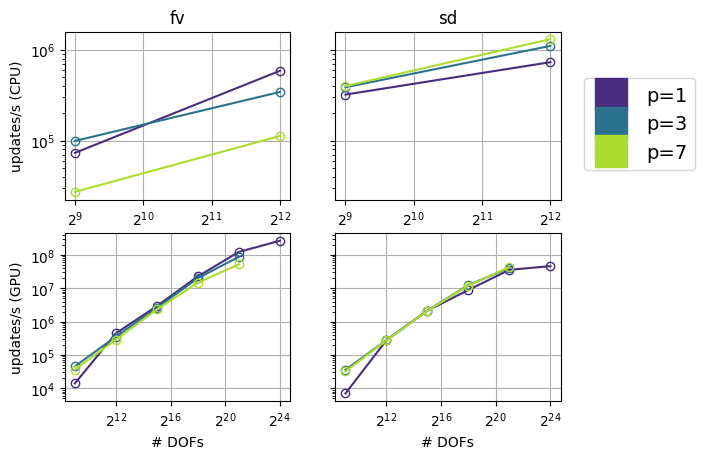

In [3]:
# plot
fig, axs = plt.subplots(2, 2, sharex="row", sharey="row")

for cupy_value, cupy_group in df.groupby("cupy"):
    for scheme_value, scheme_group in cupy_group.groupby("scheme"):
        for p_value, p_group in scheme_group.groupby("p"):
            axs[int(cupy_value), {"fv": 0, "sd": 1}[scheme_value]].plot(
                p_group["DOFs"],
                p_group["updates_per_s"],
                "-o",
                mfc="none",
                label=f"p={p_value}",
                color=get_color(p_value),
            )

leg = axs[0, 1].legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=14)
for line, p in zip(leg.get_lines(), [1, 3, 7]):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(get_color(p))

axs[0, 0].set_title("fv")
axs[0, 1].set_title("sd")
axs[1, 0].set_xlabel("# DOFs")
axs[1, 1].set_xlabel("# DOFs")
axs[0, 0].set_ylabel("updates/s (CPU)")
axs[1, 0].set_ylabel("updates/s (GPU)")
axs[0, 0].set_xscale("log", base=2)
axs[1, 0].set_xscale("log", base=2)
axs[0, 0].set_yscale("log")
axs[1, 0].set_yscale("log")
axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 0].grid()
axs[1, 1].grid()

fig.savefig(
    f"../../out/compare_sd_timing_square_{ndims}D.png", dpi=300, bbox_inches="tight"
)

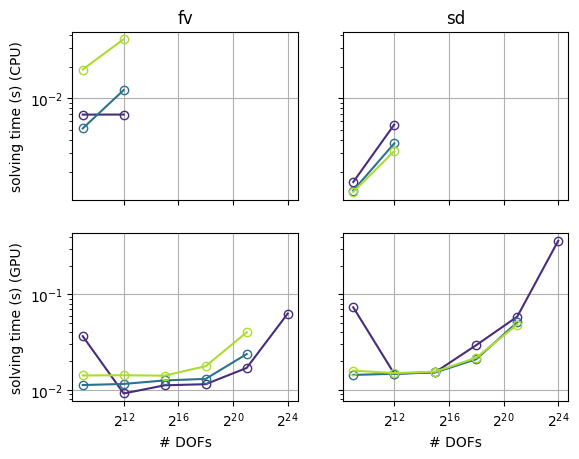

In [6]:
# plot
fig, axs = plt.subplots(2, 2, sharex=True, sharey="row")

for cupy_value, cupy_group in df.groupby("cupy"):
    for scheme_value, scheme_group in cupy_group.groupby("scheme"):
        for p_value, p_group in scheme_group.groupby("p"):
            axs[int(cupy_value), {"fv": 0, "sd": 1}[scheme_value]].plot(
                p_group["DOFs"],
                p_group["total_time"],
                "o-",
                mfc="none",
                label=f"p={p_value}",
                color=get_color(p_value),
            )
#             axs[int(cupy_value), {"fv": 0, "sd": 1}[scheme_value]].plot(
#                 p_group["DOFs"],
#                 p_group["interpolation_time"],
#                 ".",
#                 mfc="none",
#                 label=f"p={p_value}",
#                 color=get_color(p_value),
#             )
#             axs[int(cupy_value), {"fv": 0, "sd": 1}[scheme_value]].plot(
#                 p_group["DOFs"],
#                 p_group["riemann_time"],
#                 "^",
#                 mfc="none",
#                 label=f"p={p_value}",
#                 color=get_color(p_value),
#             )

# leg = axs[0, 1].legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=14)
# for line, p in zip(leg.get_lines(), [1, 3, 7]):
#     line.set_linestyle("none")
#     line.set_marker("s")
#     line.set_markersize(23)
#     line.set_markerfacecolor(get_color(p))

axs[0, 0].set_title("fv")
axs[0, 1].set_title("sd")
axs[1, 0].set_xlabel("# DOFs")
axs[1, 1].set_xlabel("# DOFs")
axs[0, 0].set_ylabel("solving time (s) (CPU)")
axs[1, 0].set_ylabel("solving time (s) (GPU)")
axs[0, 0].set_xscale("log", base=2)
axs[1, 0].set_xscale("log", base=2)
axs[0, 0].set_yscale("log")
axs[1, 0].set_yscale("log")
# axs[1, 0].set_ylim(1e-2, 1e0)
axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 0].grid()
axs[1, 1].grid()

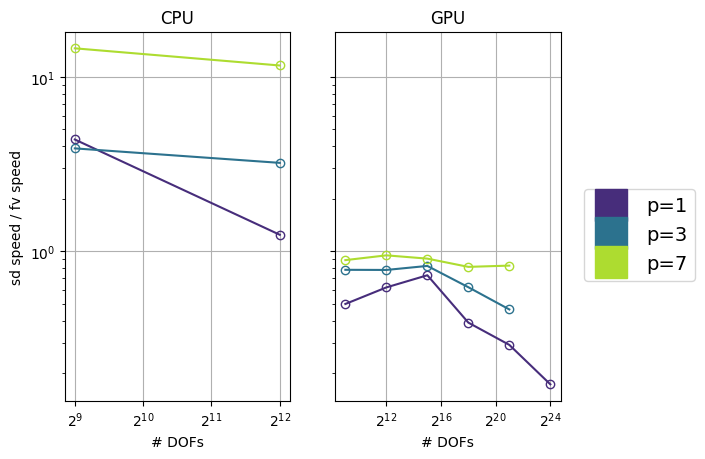

In [5]:
# plot
fig, axs = plt.subplots(1, 2, sharey=True)

for cupy_value, cupy_group in df.groupby("cupy"):
    for p_value, p_group in cupy_group.groupby("p"):
        fv_df = p_group[p_group.scheme == "fv"].reset_index()
        sd_df = p_group[p_group.scheme == "sd"].reset_index()

        axs[int(cupy_value)].plot(
            fv_df["DOFs"],
            sd_df["updates_per_s"] / fv_df["updates_per_s"],
            "-o",
            mfc="none",
            label=f"p={p_value}",
            color=get_color(p_value),
        )

leg = axs[1].legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=14)
for line, p in zip(leg.get_lines(), [1, 3, 7]):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(get_color(p))

axs[0].set_title("CPU")
axs[1].set_title("GPU")
axs[0].set_xlabel("# DOFs")
axs[1].set_xlabel("# DOFs")
axs[0].set_ylabel("sd speed / fv speed")
axs[0].set_xscale("log", base=2)
axs[1].set_xscale("log", base=2)
axs[0].set_yscale("log")
axs[0].grid()
axs[1].grid()

fig.savefig(
    f"../../out/compare_sd_timing_(relative)_square_{ndims}D.png",
    dpi=300,
    bbox_inches="tight",
)